# Customer Segmentation

## Background

This dataset contains all purchases made for an online retail company based in the UK during an eight month period. We could use cluster analysis combined with RFM analysis to do a customer segmentation.

## Prepare and Explore the Data

For this experiment, we will use [this](https://www.kaggle.com/vijayuv/onlineretail) data from Kaggle platform.

In [1]:
# Package imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', None)

In [2]:
# Load data
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df_backup = df.copy()
df_backup.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
len(df)

541909

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


ada negative di quantity
ada negative di unnit price

In [7]:
df.loc[df['CustomerID'].isna()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [8]:
#df.to_csv("Online_Retail.csv", index= False)

In [9]:
print("Total data:", len(df))

Total data: 541909


In [10]:
df[["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [11]:
weird_data = df[(df.Quantity <= 0) | ( df.UnitPrice <= 0)]

In [12]:
len(weird_data)

11805

Since we want to segment our customers, we have to make sure that `CustomerID` is not null.

In [13]:
# Check missing value
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [14]:
135080 / 541909

0.249266943342886

We could see that there is missing value in `CustomerID` columns. We could remove those missing values.

In [15]:
# Remove missing value
df = df[df["CustomerID"].notna()]
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


Then we could do some descriptive statistic.

In [16]:
# Simple descriptive statistic
df[["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


Wait, hold on. How come the quantity is a negative number and the unit price is zero? Let's check it.

In [17]:
# Check anomaly data
quantity_zero = len(df[df["Quantity"] <= 0])
perc_quantity_zero = (len(df[df["Quantity"] <= 0]) / len(df)) * 100
unitprice_zero = len(df[df["UnitPrice"] == 0])
perc_unitprice_zero = (len(df[df["UnitPrice"] == 0]) / len(df)) * 100

print("The data consist of", str(quantity_zero), "rows of data with item quantity less/equal than zero.")
print("About {:.2f}% of total data".format(perc_quantity_zero))
print("")
print("The data consist of", str(unitprice_zero), "rows of data with unit price equal to zero.")
print("About {:.2f}% of total data".format(perc_unitprice_zero))

The data consist of 8905 rows of data with item quantity less/equal than zero.
About 2.19% of total data

The data consist of 40 rows of data with unit price equal to zero.
About 0.01% of total data


Then just remove those anomaly data

In [18]:
# Remove anomaly
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
df[["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,397884.000000,397884.000000
mean,12.988238,3.116488
std,179.331775,22.097877
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


Now we're good to go. Lets do some data exploration!

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


The data contains 406829 rows and 8 columns, each row represents each item in a purchasement. The columns are:
* `InvoiceNo` - Invoice number, to identify each invoice
* `StockCode` - Stock code, to identify each item in the inventory
* `Description` - Item's description
* `Quantity` - Number of purchased item in each invoice
* `InvoiceDate` - Date of purchasement
* `UnitPrice` - Item's price per unit
* `CustomerID` - Customer's identification number
* `Country` - Customer's country of origin

In [20]:
# Check unique value
df[['InvoiceNo', 'StockCode', 'CustomerID', 'Country']].nunique()

,0
InvoiceNo,18532
StockCode,3665
CustomerID,4338
Country,37


There are 18532 purchasements, 3665 unique item purchased, from 4338 customers that came from 37 countries.

As we seen above, there are 37 countries of customer's origin. Since the retail company is based in the UK, we could simplified the country as UK or Non UK

In [21]:
# df['Country_isUK'] = df['Country'].apply(lambda x: 'UK' if x == 'United Kingdom' else 'Non UK')

In [22]:
%%timeit
df['Country'].apply(lambda x: "UK" if x == "United Kingdom" else "Non UK")

64.8 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
%%timeit
np.where(df['Country'].values == 'United Kingdom', 'UK', 'Non UK')

14.9 ms ± 2.61 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [24]:
(60.1 - 16.8)/60.1 , (1 - ((60.1 - 16.8)/60.1)) * 60

(0.7204658901830282, 16.77204658901831)

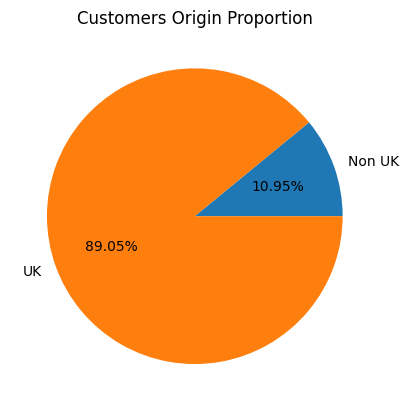

In [25]:
# Simplify country origin
df['Country_isUK'] = np.where(df['Country']=='United Kingdom', 'UK', 'Non UK')
customers_origin = df.groupby(['Country_isUK']).size()

plt.title('Customers Origin Proportion')
plt.pie(
    customers_origin,
    labels=customers_origin.index,
    autopct=lambda p: f'{p:.2f}%'
)
plt.show();

Based on the piechart, we could see that mostly our customers are from the UK.

Next, we could analyze the trend of purchasement. First, lets create `TotalAmount` column (`Quantity` * `UnitPrice`). Then, we could transform the `InvoiceDate` data type from string to date.

In [26]:
# Create new features and cast date column
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Country_isUK,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,UK,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,UK,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK,20.34


Then plot the trendline.

In [27]:
import matplotlib.dates as mdates

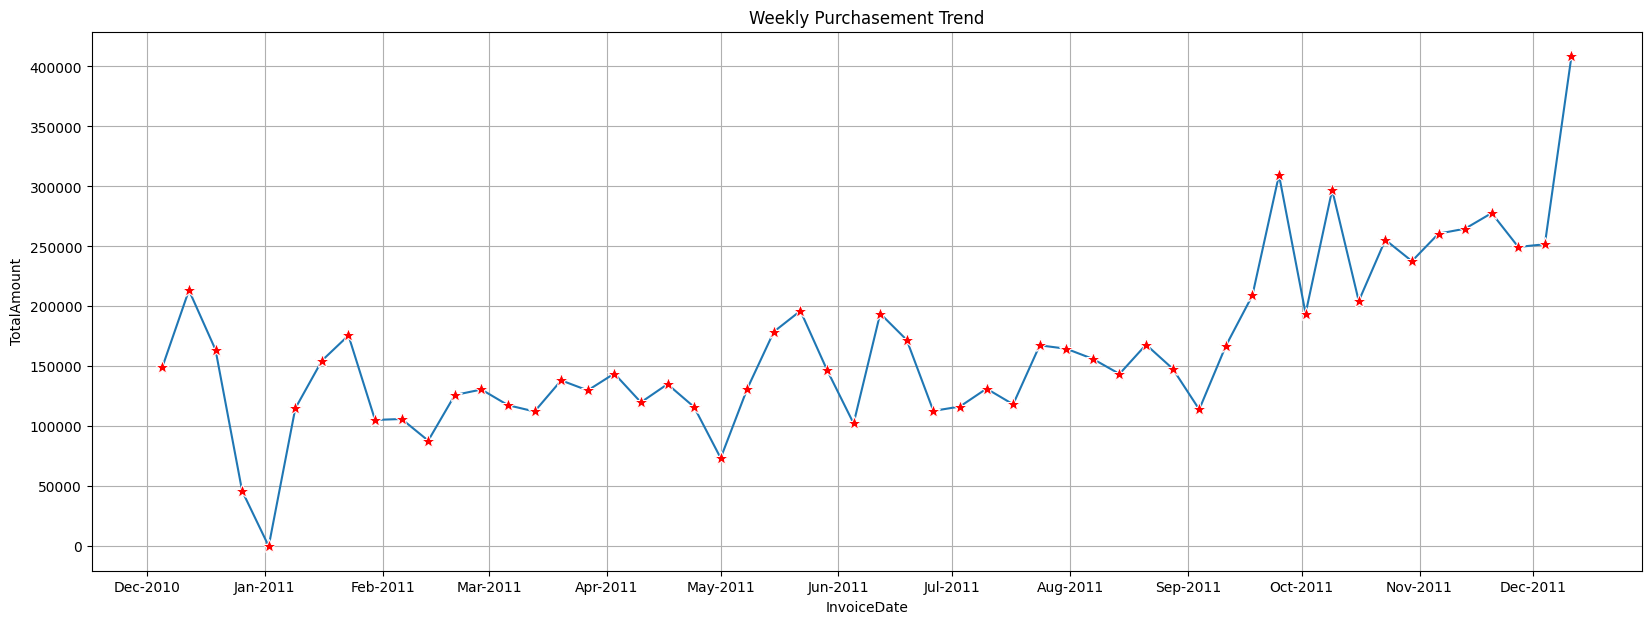

In [28]:
# Plot weekly trend
weekly_purchasements = df.copy()
weekly_purchasements = weekly_purchasements.groupby(
    by=pd.Grouper(key="InvoiceDate", freq="1W"))["TotalAmount"].sum()

plt.figure(figsize=(20, 7))
plt.title('Weekly Purchasement Trend')
ax = sns.lineplot(
    x=weekly_purchasements.index,
    y=weekly_purchasements,
    marker='*',
    markersize=10,
    markerfacecolor='red'
)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.grid()
plt.show();

In [29]:
weekly_purchasements

,TotalAmount
InvoiceDate,
2010-12-05,149386.330
2010-12-12,213447.720
2010-12-19,163770.730
2010-12-26,46109.110
2011-01-02,0.000
2011-01-09,114865.270
2011-01-16,154714.940
2011-01-23,175757.980
2011-01-30,105288.770


/tmp/ipython-input-1483929500.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  by=pd.Grouper(key="InvoiceDate", freq="1M"))["TotalAmount"].sum()


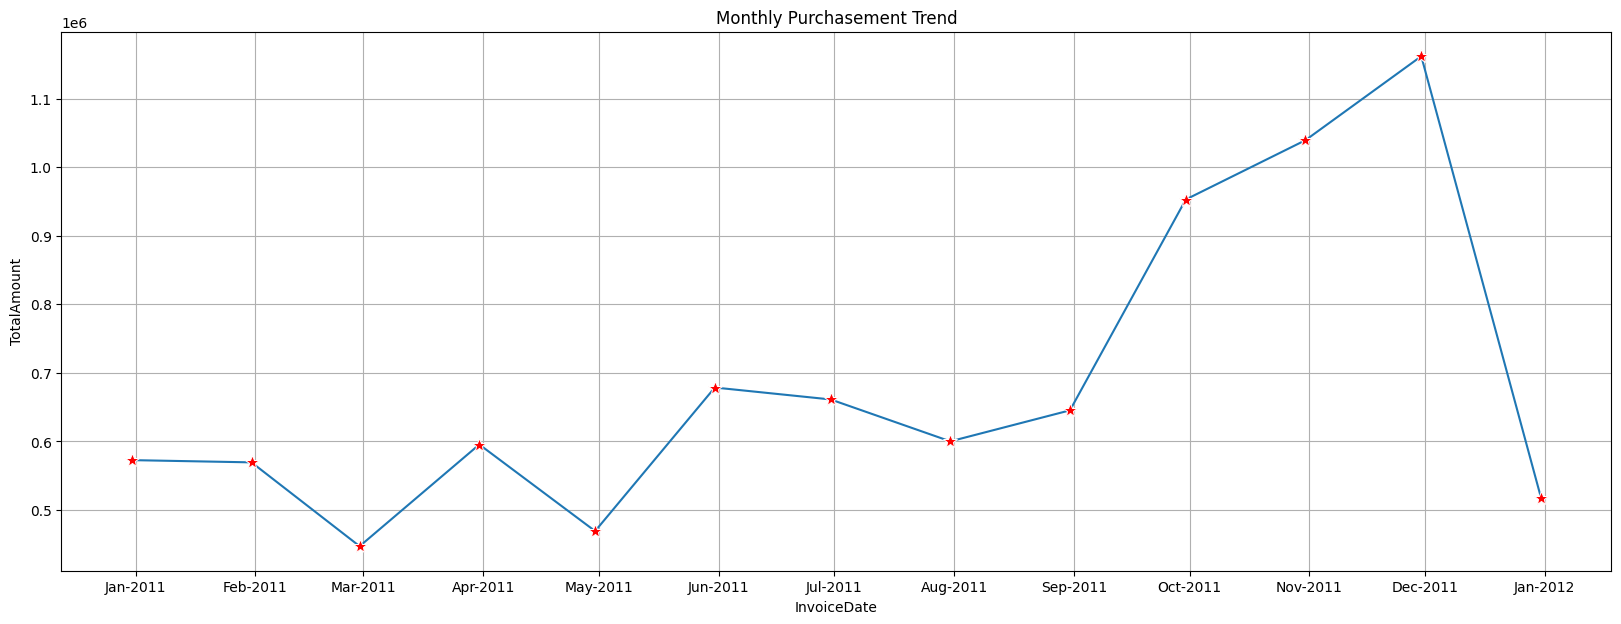

In [30]:
# Plot monthly trend
monthly_purchasements = df.copy()
monthly_purchasements = monthly_purchasements.groupby(
    by=pd.Grouper(key="InvoiceDate", freq="1M"))["TotalAmount"].sum()

plt.figure(figsize=(20, 7))
plt.title('Monthly Purchasement Trend')
ax = sns.lineplot(
    x=monthly_purchasements.index,
    y=monthly_purchasements,
    marker='*',
    markersize=10,
    markerfacecolor='red'
)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.grid()
plt.show();

Based on the picture above, it can be seen that there was an increase in total purchases at the end of the year.

## RFM

In this project, we would segment the customers using customer's demography and purchasement behavior. To explain the customer's demography, we could use `Country` column while to explain the customer's purchasement behavior we have to transform our data first to get those information. We could use RFM analysis to get those information.

### Recency

To measure customer's recency, we could substract the latest transaction date in the data with each customer's latest transaction.

In [31]:
recency = df.groupby(['CustomerID'])['InvoiceDate'].max()
recency.head(10)

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00
12352.0,2011-11-03 14:37:00
12353.0,2011-05-19 17:47:00
12354.0,2011-04-21 13:11:00
12355.0,2011-05-09 13:49:00


In [32]:
max(recency)

Timestamp('2011-12-09 12:50:00')

In [33]:
recency = max(recency) - recency
recency.head(10)

,InvoiceDate
CustomerID,
12346.0,325 days 02:49:00
12347.0,1 days 20:58:00
12348.0,74 days 23:37:00
12349.0,18 days 02:59:00
12350.0,309 days 20:49:00
12352.0,35 days 22:13:00
12353.0,203 days 19:03:00
12354.0,231 days 23:39:00
12355.0,213 days 23:01:00


In [34]:
# Get customer's recency
recency = df.groupby(['CustomerID'])['InvoiceDate'].max()
recency = max(recency) - recency
recency = recency.dt.days
recency = recency.rename('Recency')

recency.head()

,Recency
CustomerID,
12346.0,325
12347.0,1
12348.0,74
12349.0,18
12350.0,309


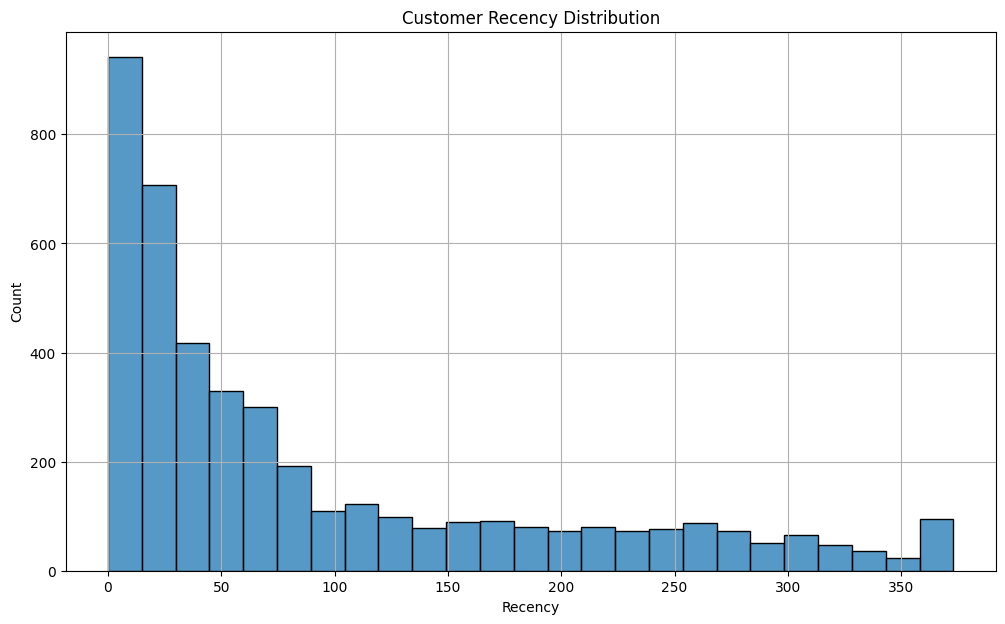

In [35]:
# Recency histogram plot
plt.figure(figsize=(12, 7))
sns.histplot(recency)
plt.title('Customer Recency Distribution')
plt.grid()
plt.show()

### Frequency

To measure customer's frequency, we could count customer's invoice.

In [36]:
# Count frequency
frequency = df.groupby(['CustomerID'])['InvoiceNo'].count()
frequency = frequency.rename('Frequency')
frequency.head()

,Frequency
CustomerID,
12346.0,1
12347.0,182
12348.0,31
12349.0,73
12350.0,17


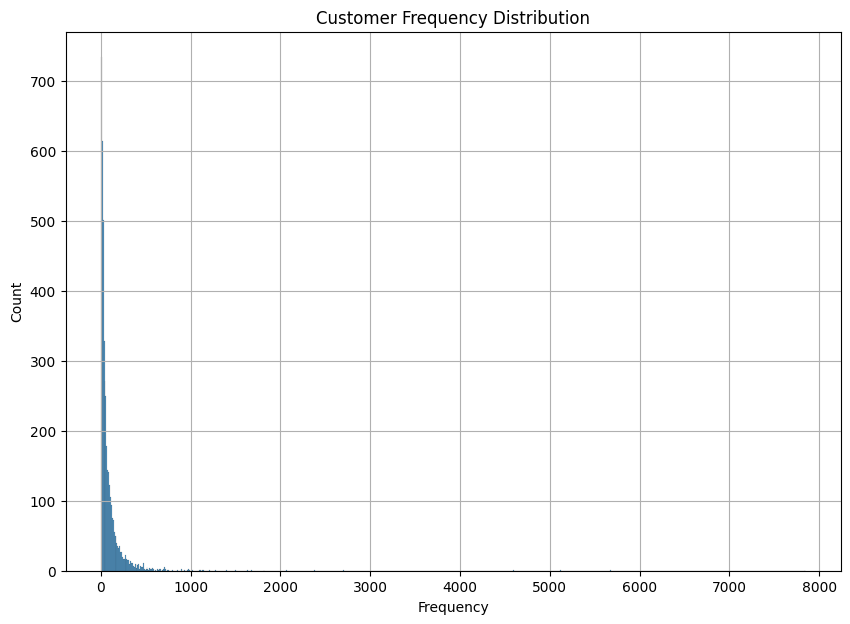

In [37]:
# Frequency histogram plot
plt.figure(figsize=(10, 7))
plt.title('Customer Frequency Distribution')
sns.histplot(frequency)
plt.grid()
plt.show();

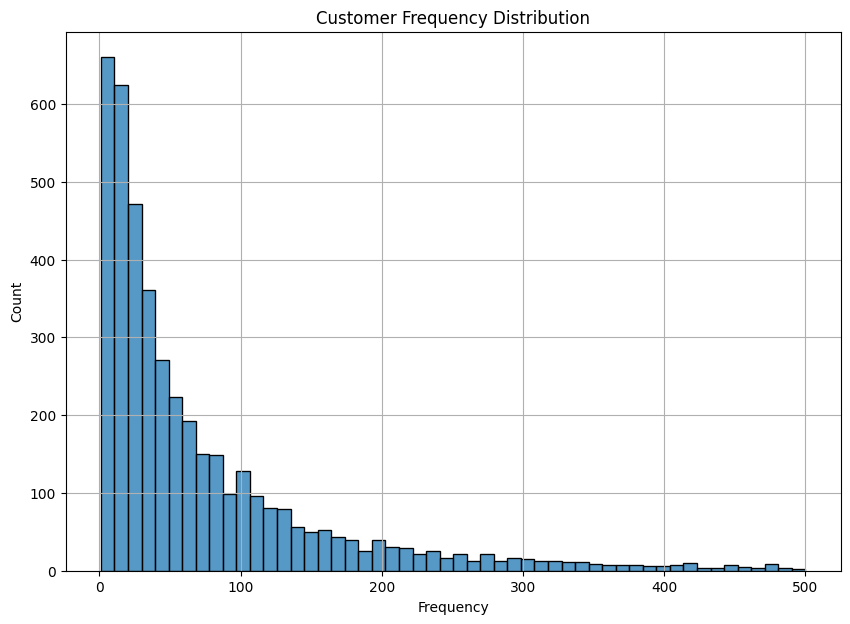

In [38]:
# Frequency histogram plot
plt.figure(figsize=(10, 7))
plt.title('Customer Frequency Distribution')
sns.histplot(frequency[frequency <= 500])
plt.grid()
plt.show();

Text(0.5, 1.0, 'Frequency <= 500')

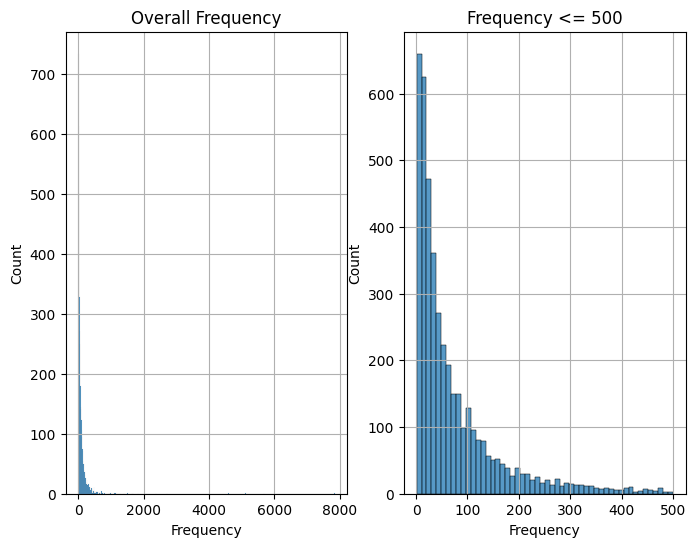

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(8, 6))
sns.histplot(frequency, ax=axs[0])
sns.histplot(frequency[frequency <= 500], ax=axs[1])

axs[0].grid()
axs[0].set_title('Overall Frequency')

axs[1].grid()
axs[1].set_title('Frequency <= 500')

In [40]:
frequency.head()

,Frequency
CustomerID,
12346.0,1
12347.0,182
12348.0,31
12349.0,73
12350.0,17


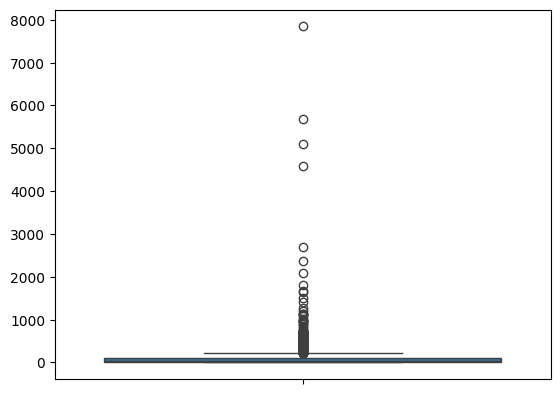

In [41]:
sns.boxplot(frequency.values);

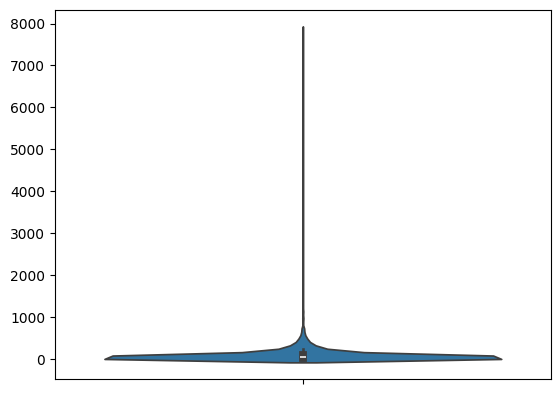

In [42]:
sns.violinplot(frequency.values);

### Monetary

To measure customer's monetary, we could sum the customer's total purchasements.

In [43]:
# Sum the money spent
monetary = df.groupby(['CustomerID'])['TotalAmount'].sum()
monetary = monetary.rename('Monetary')
monetary.head()

,Monetary
CustomerID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


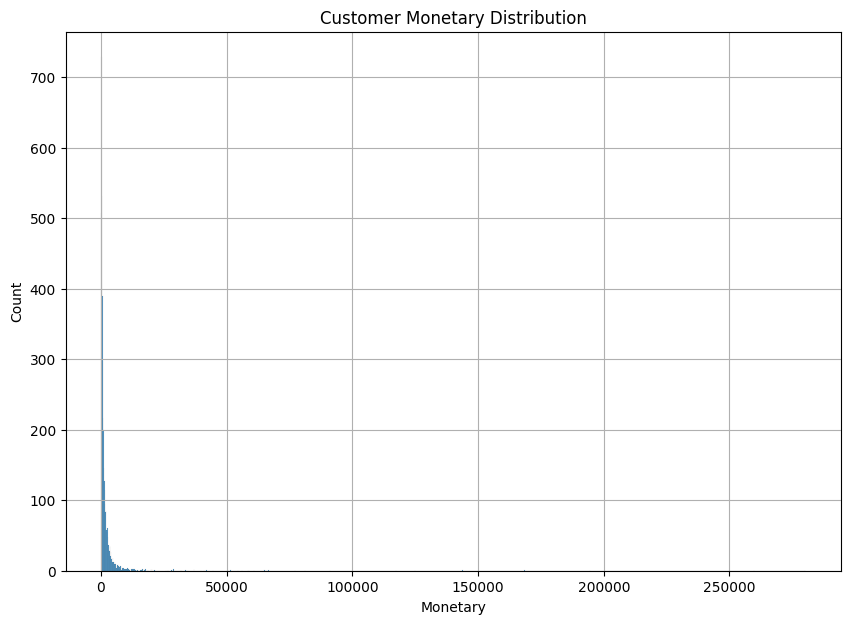

In [44]:
# Monetary histogram plot
plt.figure(figsize=(10, 7))
plt.title('Customer Monetary Distribution')
sns.histplot(monetary)
plt.grid()
plt.show()

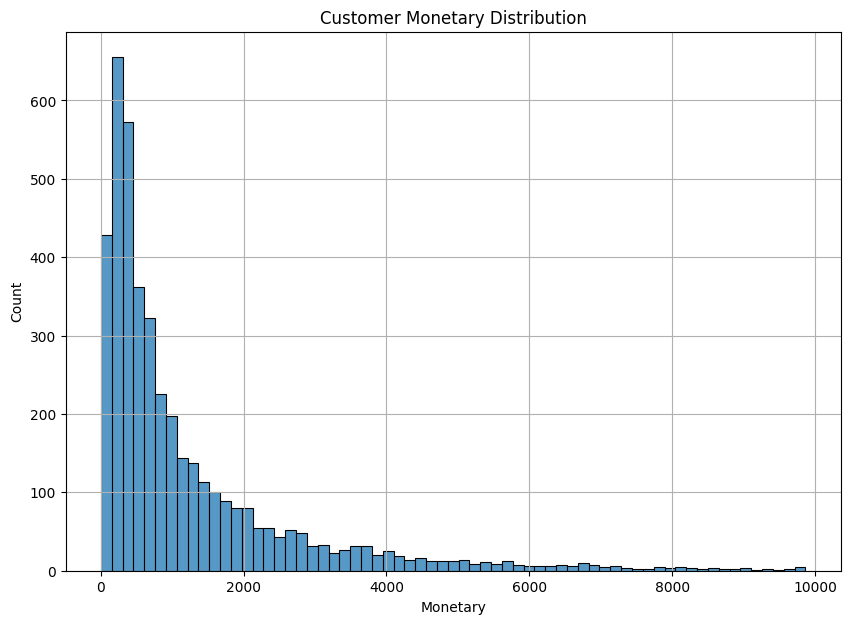

In [45]:
plt.figure(figsize=(10, 7))
plt.title('Customer Monetary Distribution')
sns.histplot(monetary[monetary < 10000])
plt.grid()
plt.show()

### Merge the Data

The data could be separated into two dataframes. The first dataframe (log transformed data) supposed to be used when modeling and the second one (without log transformation) could be used when visualize the result.

In [46]:
(
    df
    .groupby(['CustomerID', 'Country_isUK'])
    .size()
    .reset_index()
    .drop(0, axis=1)
)

,CustomerID,Country_isUK
0,12346.0,UK
1,12347.0,Non UK
2,12348.0,Non UK
3,12349.0,Non UK
4,12350.0,Non UK
5,12352.0,Non UK
6,12353.0,Non UK
7,12354.0,Non UK
8,12355.0,Non UK
9,12356.0,Non UK


In [47]:
df.groupby(['CustomerID', 'Country_isUK']).size()

,,0
CustomerID,Country_isUK,
12346.0,UK,1
12347.0,Non UK,182
12348.0,Non UK,31
12349.0,Non UK,73
12350.0,Non UK,17
12352.0,Non UK,85
12353.0,Non UK,4
12354.0,Non UK,58
12355.0,Non UK,13


In [48]:
# Get customer's country of origin
country = (
    df
    .groupby(['CustomerID', 'Country_isUK'])
    .size()
    .reset_index()
    .drop(0, axis=1)
)

# Merge the data
df_new = (
    country
    .merge(recency, on='CustomerID')
    .merge(frequency, on='CustomerID')
    .merge(monetary, on='CustomerID')
)

# Set CustomerID as index
df_new = df_new.set_index('CustomerID')
df_new.head(20)

,Country_isUK,Recency,Frequency,Monetary
CustomerID,,,,
12346.0,UK,325,1,77183.60
12347.0,Non UK,1,182,4310.00
12348.0,Non UK,74,31,1797.24
12349.0,Non UK,18,73,1757.55
12350.0,Non UK,309,17,334.40
12352.0,Non UK,35,85,2506.04
12353.0,Non UK,203,4,89.00
12354.0,Non UK,231,58,1079.40
12355.0,Non UK,213,13,459.40


### One Hot Encoding

Since our model could just accept the numeric value, we have to recode the non numeric column.

In [49]:
# Recode the non numeric variable

df_new = pd.get_dummies(
    df_new,
    columns=['Country_isUK'],
    drop_first=True
)

df_new = df_new.rename(
    columns={'Country_isUK_UK': 'Country_UK'}
)

df_new.head()

,Recency,Frequency,Monetary,Country_UK
CustomerID,,,,
12346.0,325,1,77183.60,True
12347.0,1,182,4310.00,False
12348.0,74,31,1797.24,False
12349.0,18,73,1757.55,False
12350.0,309,17,334.40,False


### Scaling

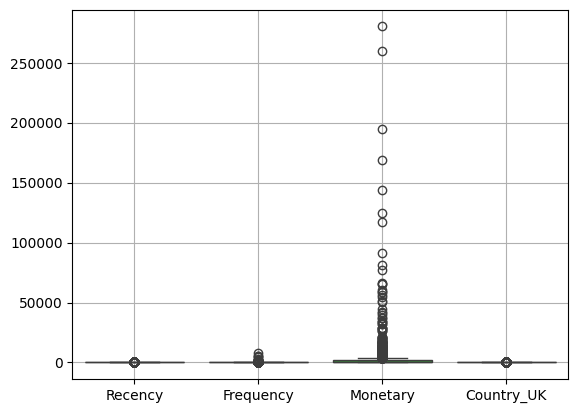

In [50]:
sns.boxplot(data=df_new)
plt.grid()
plt.show()

As we could see, there are variation of range in each column. We have to standardize it first.

In [51]:
# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)

df_scaled = pd.DataFrame(
    df_scaled,
    columns=df_new.columns,
    index=df_new.index
)

df_scaled.head()

,Recency,Frequency,Monetary,Country_UK
CustomerID,,,,
12346.0,2.334574,-0.396578,8.358668,0.326547
12347.0,-0.905340,0.394649,0.250966,-3.062350
12348.0,-0.175360,-0.265435,-0.028596,-3.062350
12349.0,-0.735345,-0.081836,-0.033012,-3.062350
12350.0,2.174578,-0.326635,-0.191347,-3.062350


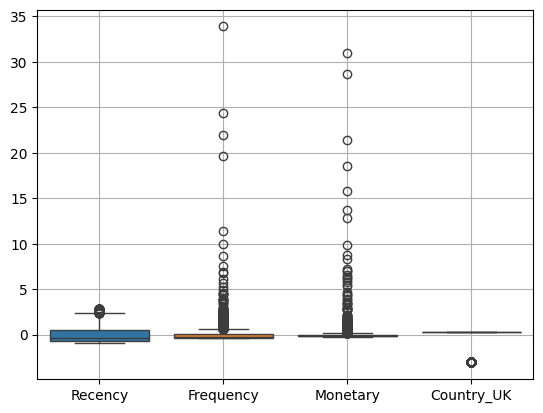

In [52]:
# Plot scaled data
sns.boxplot(data=df_scaled)
plt.grid()
plt.show()

## Modeling

In [53]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [54]:
# Modeling
possible_k = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette = []

for k in possible_k:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_scaled)
    silhouette.append(silhouette_score(X=df_scaled, labels=kmeans.labels_))

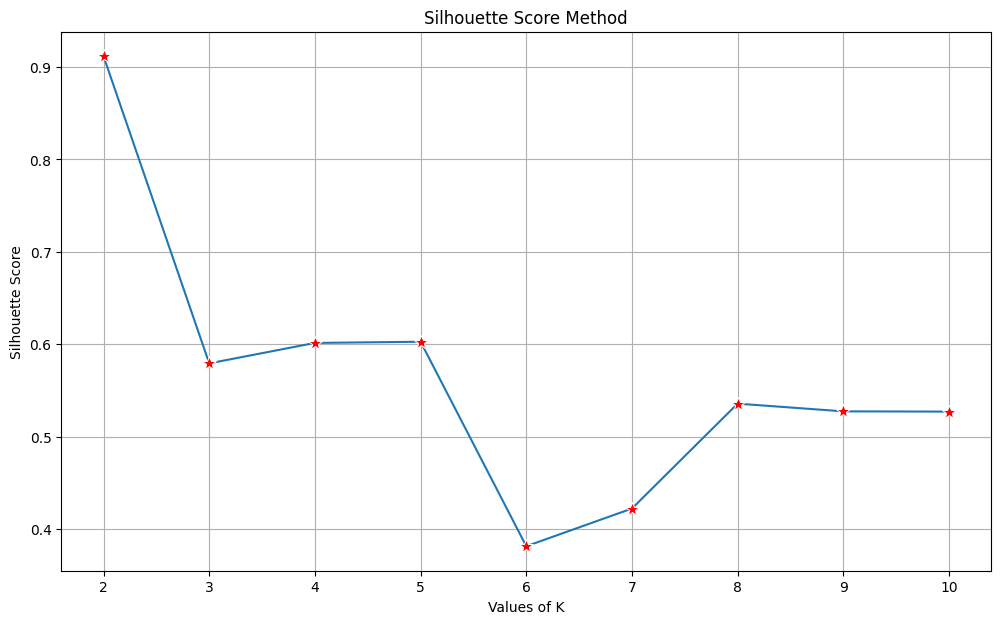

In [55]:
# Plot the score
plt.figure(figsize=(12, 7))
sns.lineplot(
    x=possible_k,
    y=silhouette,
    marker='*',
    markersize=10,
    markerfacecolor='red'
)
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.grid()
plt.show();

Using silhouette score, the best K is either 2 or 6

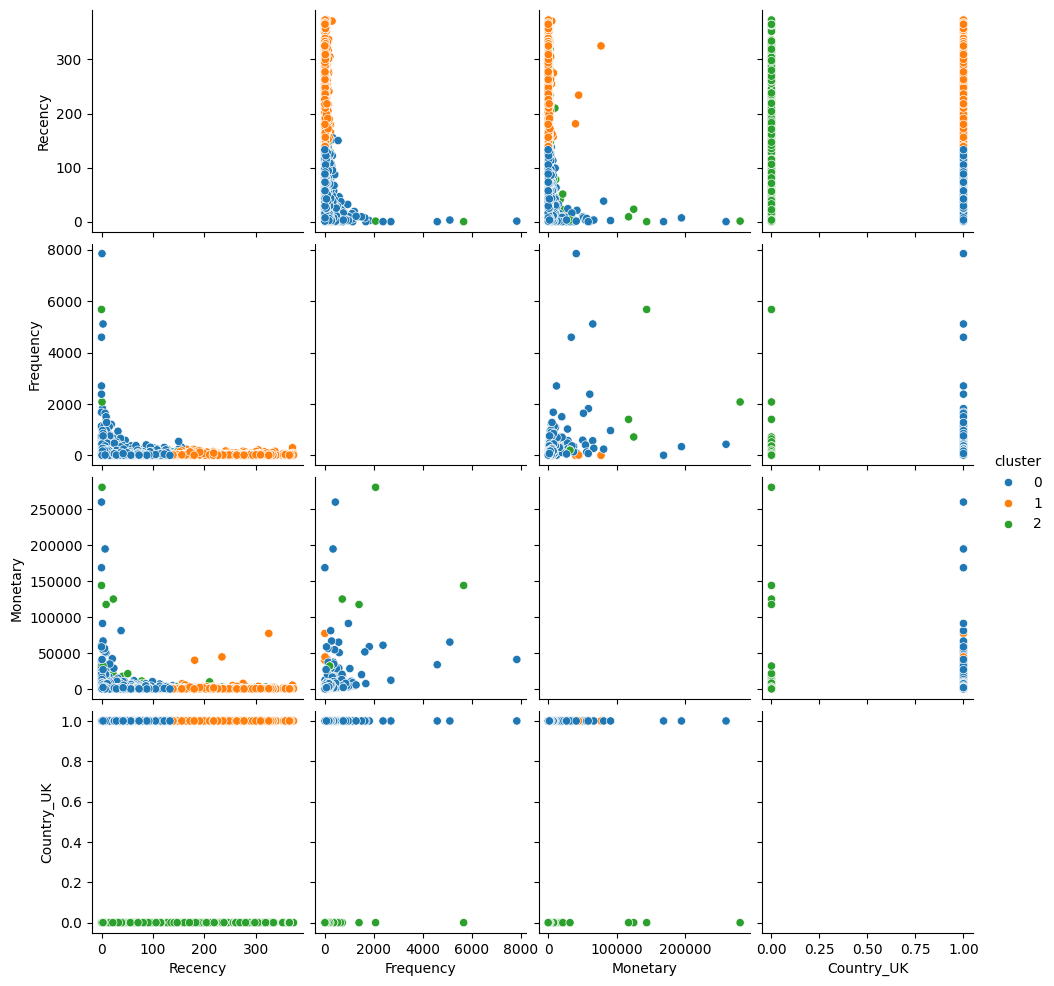

In [56]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(df_scaled)

df_result_kmeans = df_new.copy()
df_result_kmeans['cluster'] = kmeans.labels_

sns.pairplot(
    data=df_result_kmeans,
    hue='cluster',
    diag_kind='None',
    palette='tab10'
)

plt.show();

In [57]:
# Quantile function
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

# Simple descriptive statistic
(
    df_result_kmeans
    .drop("Country_UK", axis = 1)
    .groupby('cluster')
    .aggregate(['mean', 'std', 'min', q25, 'median', q75, 'max'])
    .transpose()
)

cluster                       0             1              2
Recency   mean        39.530598    243.142714      94.571770
          std         34.796185     67.322624     104.485451
          min          0.000000    135.000000       0.000000
          q25         11.000000    185.000000      18.000000
          median      29.000000    238.000000      51.000000
          q75         61.000000    294.000000     134.500000
          max        155.000000    373.000000     373.000000
Frequency mean       111.691966     27.760804     104.217703
          std        247.879197     32.138112     313.632715
          min          1.000000      1.000000       1.000000
          q25         24.000000      8.500000      22.000000
          median      57.000000     18.000000      45.000000
          q75        124.000000     33.000000     102.500000
          max       7847.000000    297.000000    5675.000000
Monetary  mean      2290.607659    611.421257    3834.967344
          std       8426.400177   3127.899451   17626.226186
          min          6.200000      3.750000      51.560000
          q25        396.480000    163.250000     460.522500
          median     903.900000    305.780000    1031.995000
          q75       2031.780000    511.250000    2705.637500
          max     259657.300000  77183.600000  280206.020000

In [58]:
df_result_kmeans.head(20)

,Recency,Frequency,Monetary,Country_UK,cluster
CustomerID,,,,,
12346.0,325,1,77183.60,True,1
12347.0,1,182,4310.00,False,2
12348.0,74,31,1797.24,False,2
12349.0,18,73,1757.55,False,2
12350.0,309,17,334.40,False,2
12352.0,35,85,2506.04,False,2
12353.0,203,4,89.00,False,2
12354.0,231,58,1079.40,False,2
12355.0,213,13,459.40,False,2


In [59]:
df.CustomerID.nunique()

4338

In [60]:
df_result_kmeans.groupby(["cluster", "Country_UK"])["Recency"].count()

,,Recency
cluster,Country_UK,
0,True,2925
1,True,995
2,False,418


In [61]:
df_result_kmeans.groupby(["cluster", "Country_UK"])["Frequency"].count()

,,Frequency
cluster,Country_UK,
0,True,2925
1,True,995
2,False,418


That's it! The customer's behavior really segmented by their country of origin.

What if we separate the customer by its country of origin before doing cluster analysis?

In [62]:
df_result_kmeans.Recency.quantile([0.25, 0.5, 0.75])

,Recency
0.25,17.0
0.50,50.0
0.75,141.0


In [63]:
def rqs(recency_score):
  if recency_score < 17:
    return "High_R"
  elif 17 <= recency_score < 50:
    return "Medium_R"
  elif 50 <= recency_score < 141:
    return "Low_R"
  else:
    return "Bad_R"

df_result_kmeans["Recency_Quality"] = df_result_kmeans['Recency'].apply(rqs)
df_result_kmeans.head(20)

,Recency,Frequency,Monetary,Country_UK,cluster,Recency_Quality
CustomerID,,,,,,
12346.0,325,1,77183.60,True,1,Bad_R
12347.0,1,182,4310.00,False,2,High_R
12348.0,74,31,1797.24,False,2,Low_R
12349.0,18,73,1757.55,False,2,Medium_R
12350.0,309,17,334.40,False,2,Bad_R
12352.0,35,85,2506.04,False,2,Medium_R
12353.0,203,4,89.00,False,2,Bad_R
12354.0,231,58,1079.40,False,2,Bad_R
12355.0,213,13,459.40,False,2,Bad_R


In [64]:
df_result_kmeans["Recency_Quality"].value_counts()

,count
Recency_Quality,
Medium_R,1092
Low_R,1092
Bad_R,1088
High_R,1066


In [65]:
# recency_quatile_scoring: rqs
def rqs_if_else(recency_score):
  if recency_score < 17:
    return "High_R"
  elif 17 <= recency_score < 50:
    return "Medium_R"
  elif 50 <= recency_score < 141:
    return "Low_R"
  else:
    return "Bad_R"

In [66]:
%timeit df_result_kmeans['Recency'].apply(rqs_if_else)

1.06 ms ± 72.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [67]:
import numpy as np

def rqs_np(recency_score):
    thresholds = [17, 50, 141]
    labels = ["High_R", "Medium_R", "Low_R", "Bad_R"]
    return labels[np.digitize(recency_score, thresholds, right=True)]

In [68]:
%timeit df_result_kmeans['Recency'].apply(rqs_np)

22 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [69]:
data_recency = df_result_kmeans['Recency'].values

In [70]:
%%timeit
np.apply_along_axis(rqs, axis=0, arr=data_recency.reshape(1,-1))

42.8 ms ± 7.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [71]:
pd.Series(np.apply_along_axis(rqs, axis=0, arr=data_recency.reshape(1,-1))).value_counts()

,count
Mediu,1092
Low_R,1092
Bad_R,1088
High_,1066


In [72]:
np.apply_along_axis(rqs, axis=0, arr=data_recency.reshape(1,-1))

array(['Bad_R', 'High_', 'Low_R', ..., 'High_', 'High_', 'Mediu'],
      dtype='<U5')

# Question

1. (30 point) Lakukan EDA lebih mendalam dari data yang tersedia. Misalnya:
- a) Siapa top 5 customer dengan pembelian terbanyak?
- b) Kapan waktu pembelian dengan jumlah customer terbanyak? (Misal hari apa, jam berapa, bulan apa, minggu ke berapa, dst). EDA juga bisa dilakukan menggunakan business question lain.
2. (30 point) Apa karakteristik/ciri utama dari masing-masing cluster? Apa promo yang kira-kira cocok untuk diberikan ke masing-masing cluster?
3. (40 point) Bagaimana jika segmentation difokuskan untuk customer di luar UK? Apakah terdapat insight yang menarik? Apa karakteristik utama dari cluster-cluster non UK?

In [74]:
df_result_kmeans.head(10)

,Recency,Frequency,Monetary,Country_UK,cluster,Recency_Quality
CustomerID,,,,,,
12346.0,325,1,77183.60,True,1,Bad_R
12347.0,1,182,4310.00,False,2,High_R
12348.0,74,31,1797.24,False,2,Low_R
12349.0,18,73,1757.55,False,2,Medium_R
12350.0,309,17,334.40,False,2,Bad_R
12352.0,35,85,2506.04,False,2,Medium_R
12353.0,203,4,89.00,False,2,Bad_R
12354.0,231,58,1079.40,False,2,Bad_R
12355.0,213,13,459.40,False,2,Bad_R


##Top 5 Customers

In [81]:
top5_customers = (
    df_result_kmeans[['Recency', 'Frequency', 'Monetary', 'cluster']]
    .sort_values(by='Monetary', ascending=False)
    .head(5)
)
top5_customers


,Recency,Frequency,Monetary,cluster
CustomerID,,,,
14646.0,1,2076,280206.02,2
18102.0,0,431,259657.30,0
17450.0,7,337,194550.79,0
16446.0,0,3,168472.50,0
14911.0,0,5675,143825.06,2



*   Cluster 2 appears to contain highly loyal and active customers with both high frequency and monetary values.

*   Cluster 0 includes valuable but mixed customers — some are active, while others show signs of inactivity (high recency).

*   These top customers represent the core contributors to total revenue, and Cluster 2 should be prioritized for retention programs, while Cluster 0 customers could benefit from re-engagement strategies.



##Customer Analysis by time

=== Customer Count by Hour ===
Hour
12    1637
13    1573
14    1386
11    1303
15    1275
Name: CustomerID, dtype: int64

=== Customer Count by Day ===
DayName
Thursday     2007
Wednesday    1778
Tuesday      1701
Monday       1595
Friday       1557
Sunday       1225
Name: CustomerID, dtype: int64

=== Customer Count by Week ===
Week
48    745
49    723
46    569
45    517
47    492
Name: CustomerID, dtype: int64

=== Customer Count by Month ===
Month
November     1664
October      1364
September    1266
December     1265
May          1056
June          991
March         974
July          949
August        935
April         856
February      758
January       741
Name: CustomerID, dtype: int64


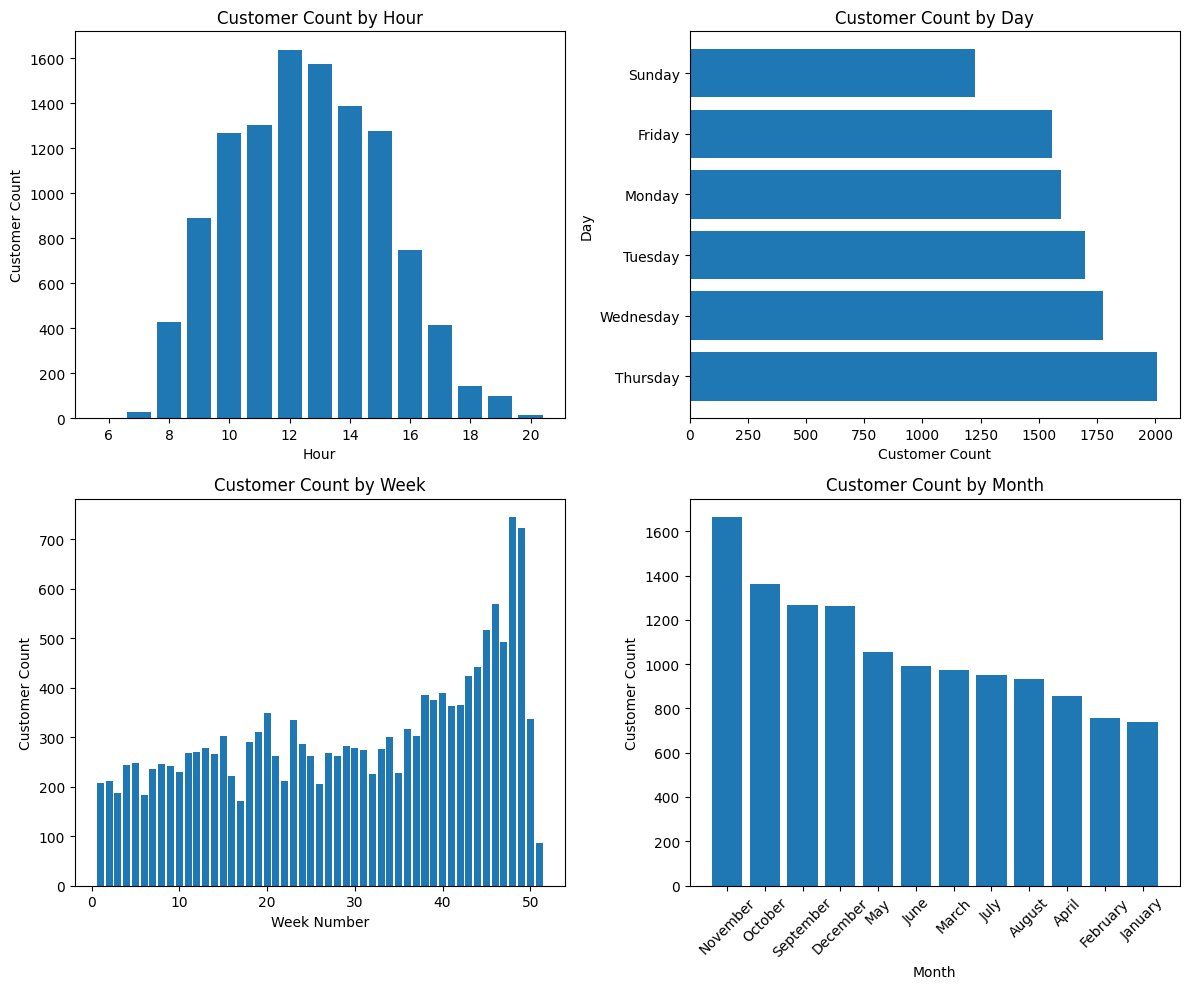


=== Summary of Peak Activity ===
🕒 Highest customer activity hour  : 12:00
📅 Busiest day                    : Thursday
🗓️  Busiest week number           : Week 48
📆 Busiest month                  : November


In [79]:
# ==========================================
# 📊 Customer Activity Analysis by Time
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt

# === 1️⃣ Prepare the data ===
# Make sure your datetime column is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract hour, day name, week number, and month name
df['Hour'] = df['InvoiceDate'].dt.hour
df['DayName'] = df['InvoiceDate'].dt.day_name()
df['Week'] = df['InvoiceDate'].dt.isocalendar().week
df['Month'] = df['InvoiceDate'].dt.month_name()

# === 2️⃣ Count unique customers for each time dimension ===
hour_counts = df.groupby('Hour')['CustomerID'].nunique().sort_values(ascending=False)
day_counts = df.groupby('DayName')['CustomerID'].nunique().sort_values(ascending=False)
week_counts = df.groupby('Week')['CustomerID'].nunique().sort_values(ascending=False)
month_counts = df.groupby('Month')['CustomerID'].nunique().sort_values(ascending=False)

# === 3️⃣ Display summary tables ===
print("=== Customer Count by Hour ===")
print(hour_counts.head())
print("\n=== Customer Count by Day ===")
print(day_counts)
print("\n=== Customer Count by Week ===")
print(week_counts.head())
print("\n=== Customer Count by Month ===")
print(month_counts)

# === 4️⃣ Visualization (Optional) ===
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# --- Plot 1: Hour ---
axes[0, 0].bar(hour_counts.index, hour_counts.values)
axes[0, 0].set_title("Customer Count by Hour")
axes[0, 0].set_xlabel("Hour")
axes[0, 0].set_ylabel("Customer Count")

# --- Plot 2: Day ---
axes[0, 1].barh(day_counts.index, day_counts.values)
axes[0, 1].set_title("Customer Count by Day")
axes[0, 1].set_xlabel("Customer Count")
axes[0, 1].set_ylabel("Day")

# --- Plot 3: Week ---
axes[1, 0].bar(week_counts.index, week_counts.values)
axes[1, 0].set_title("Customer Count by Week")
axes[1, 0].set_xlabel("Week Number")
axes[1, 0].set_ylabel("Customer Count")

# --- Plot 4: Month ---
axes[1, 1].bar(month_counts.index, month_counts.values)
axes[1, 1].set_title("Customer Count by Month")
axes[1, 1].set_xlabel("Month")
axes[1, 1].set_ylabel("Customer Count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# === 5️⃣ Identify top results ===
top_hour = hour_counts.idxmax()
top_day = day_counts.idxmax()
top_week = week_counts.idxmax()
top_month = month_counts.idxmax()

print("\n=== Summary of Peak Activity ===")
print(f"🕒 Highest customer activity hour  : {top_hour}:00")
print(f"📅 Busiest day                    : {top_day}")
print(f"🗓️  Busiest week number           : Week {top_week}")
print(f"📆 Busiest month                  : {top_month}")


🧠 Insights from Customer Activity Analysis
*   *Peak Purchase Hour (12:00 PM)*:
Customer activity reaches its highest point around noon. This may indicate that customers tend to make purchases during lunch breaks or midday leisure time.
*   *Busiest Day (Thursday)*:
Thursday shows the highest customer engagement. This pattern could reflect end-of-week buying behavior, as customers prepare for upcoming weekend needs or promotions.
*   *Busiest Week (Week 48)*:
Week 48 experiences the greatest number of transactions, potentially linked to seasonal campaigns such as Black Friday or year-end sales.
*  *Busiest Month (November)*:
November stands out as the month with the most customer activity. This aligns with common retail trends, where promotional events and holiday shopping drive significant purchase volume.

## 📊 Cluster Characteristics Interpretation

In [84]:

# ---  Aggregate RFM metrics per cluster ---
cluster_summary = (
    df_result_kmeans
    .groupby('cluster')[['Recency', 'Frequency', 'Monetary']]
    .mean()
    .round(2)
    .reset_index()
)
print(cluster_summary)

   cluster  Recency  Frequency  Monetary
0        0    39.53     111.69   2290.61
1        1   243.14      27.76    611.42
2        2    94.57     104.22   3834.97




*   *Cluster 0*

*Active and fairly loyal customers* — they purchase quite often and spend a good amount. Their recent activity (Recency ≈ 40) means they are still engaged.
*   *Cluster 1*

*Inactive or lost customers* — they haven’t purchased in a long time, with low spending and few transactions. They represent low-value and inactive buyers.
*   *Cluster 2*

*High-spending and moderately active customers* — they spend the most on average, purchase relatively frequently, and are fairly recent. They are likely *premium or loyal customers*.



## 🧩Compare UK vs Non-UK Customer Segments

In [89]:
# ---  Filter only non-UK customers (Country_UK == False) ---
df_non_uk = df_result_kmeans[df_result_kmeans['Country_UK'] == False].copy()

# ---  Standardize/scale RFM features (optional jika belum diskalakan) ---
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_non_uk_scaled = scaler.fit_transform(df_non_uk[['Recency', 'Frequency', 'Monetary']])

# ---  Run K-Means for non-UK customers ---
from sklearn.cluster import KMeans
kmeans_non_uk = KMeans(n_clusters=3, random_state=42)
df_non_uk['cluster'] = kmeans_non_uk.fit_predict(df_non_uk_scaled)

# ---  Summarize average RFM per cluster ---
cluster_summary_non_uk = (
    df_non_uk
    .groupby('cluster')[['Recency', 'Frequency', 'Monetary']]
    .mean()
    .round(2)
    .reset_index()
)

# ---  Display summary ---
print(cluster_summary_non_uk)

   cluster  Recency  Frequency   Monetary
0        0    45.31     103.02    3404.71
1        1     0.50    3875.50  212015.54
2        2   272.58      25.60     796.19


In [94]:
# --- Filter only UK customers (Country_UK == True) ---
df_uk = df_result_kmeans[df_result_kmeans['Country_UK'] == True].copy()

# --- Standardize/scale RFM features (optional if not scaled yet) ---
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_uk_scaled = scaler.fit_transform(df_uk[['Recency', 'Frequency', 'Monetary']])

# --- Run K-Means for UK customers ---
from sklearn.cluster import KMeans
kmeans_uk = KMeans(n_clusters=3, random_state=42)
df_uk['cluster'] = kmeans_uk.fit_predict(df_uk_scaled)

# --- Summarize average RFM per cluster ---
cluster_summary_uk = (
    df_uk
    .groupby('cluster')[['Recency', 'Frequency', 'Monetary']]
    .mean()
    .round(2)
    .reset_index()
)

# --- Display summary ---
print(cluster_summary_uk)


   cluster  Recency  Frequency  Monetary
0        0   244.08      27.70    494.04
1        1    26.07    1927.27  88453.22
2        2    40.05     102.07   1881.36


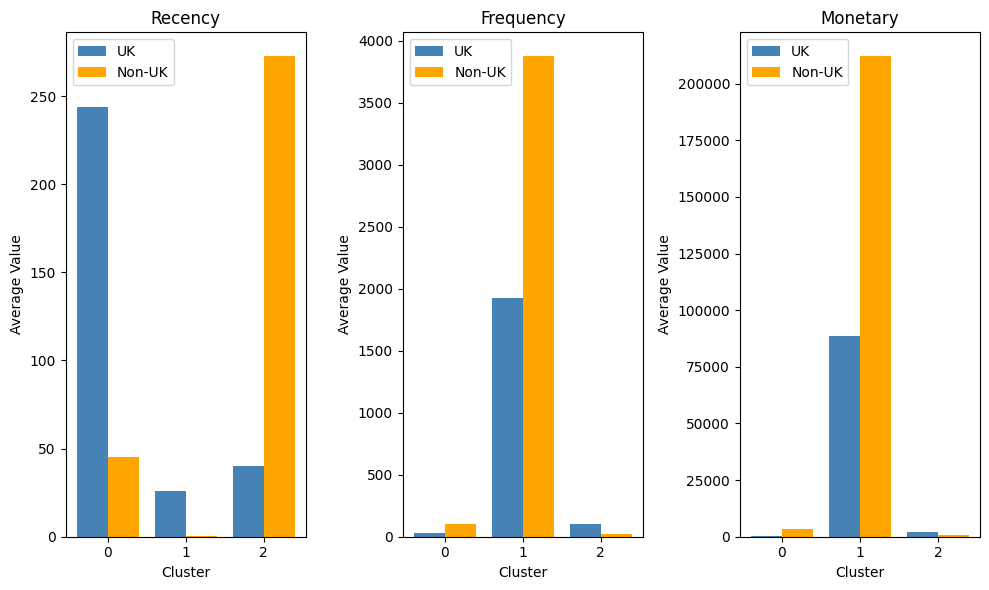

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

# --- UK summary ---
cluster_summary_uk = pd.DataFrame({
    'cluster': [0, 1, 2],
    'Recency': [244.08, 26.07, 40.05],
    'Frequency': [27.70, 1927.27, 102.07],
    'Monetary': [494.04, 88453.22, 1881.36],
    'Region': 'UK'
})

# --- Non-UK summary ---
cluster_summary_non_uk = pd.DataFrame({
    'cluster': [0, 1, 2],
    'Recency': [45.31, 0.50, 272.58],
    'Frequency': [103.02, 3875.50, 25.60],
    'Monetary': [3404.71, 212015.54, 796.19],
    'Region': 'Non-UK'
})

# --- Combine both datasets ---
combined_summary = pd.concat([cluster_summary_uk, cluster_summary_non_uk])

# --- Melt for easier plotting ---
combined_melted = combined_summary.melt(
    id_vars=['cluster', 'Region'],
    value_vars=['Recency', 'Frequency', 'Monetary'],
    var_name='Metric',
    value_name='Value'
)

# --- Plot using bar chart ---
plt.figure(figsize=(10,6))
for metric in ['Recency', 'Frequency', 'Monetary']:
    subset = combined_melted[combined_melted['Metric'] == metric]
    plt.subplot(1, 3, ['Recency', 'Frequency', 'Monetary'].index(metric) + 1)
    plt.bar(
        subset[subset['Region'] == 'UK']['cluster'] - 0.2,
        subset[subset['Region'] == 'UK']['Value'],
        width=0.4, label='UK', color='steelblue'
    )
    plt.bar(
        subset[subset['Region'] == 'Non-UK']['cluster'] + 0.2,
        subset[subset['Region'] == 'Non-UK']['Value'],
        width=0.4, label='Non-UK', color='orange'
    )
    plt.title(metric)
    plt.xlabel('Cluster')
    plt.ylabel('Average Value')
    plt.legend()

plt.tight_layout()
plt.show()



*   Non-UK customers tend to have fresher and more consistent purchasing activity compared to UK customers.
*   There’s a segment of highly loyal Non-UK customers—likely large resellers or international corporate buyers—with intense purchasing behavior.
*   The Non-UK market, though possibly smaller in size, contributes more revenue per customer and represents a highly profitable segment.

**Non-UK customers*, although *fewer in number*, have a much *stronger impact* on *total revenue* compared to UK customers.
They tend to purchase more frequently, spend significantly more, and maintain more recent engagement with the business — suggesting that Non-UK buyers represent a premium, high-value segment.*



